In [2]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# # ADABOOST REMOVING FEATURE


# Load the data from the CSV file
train = pd.read_csv('../data/income2023f/train_final.csv')
test = pd.read_csv('../data/income2023f/test_final.csv')

# Separate the features from the labels                         
X_train = train.drop('income>50K', axis=1)
#X_train with only columns 'marital-status', 'education-num', relationship, age
# X_train = X_train[['marital.status', 'education.num', 'relationship', 'age']]

y_train = train['income>50K']
# y_train = y_train.replace(0, -1)

X_test_f = test.drop('ID', axis=1)
# X_test_f = X_test_f[['marital.status', 'education.num', 'relationship', 'age']]

# handle missing data
# X_train = X_train.fillna(X_train.mean())
for column in X_train.columns:
    if (X_train[column].isin(['?']).any() and X_train[column].dtype == type(object)):
        X_train[column] = X_train[column].replace('?', X_train[column].mode()[0])
    elif (X_train[column].isin(['?']).any()):
        X_train[column] = X_train[column].replace('?', X_train[column].median())


for column in X_train.columns:
    if X_train[column].dtype == type(object):
        encoder = LabelEncoder()
        X_train[column] = encoder.fit_transform(X_train[column])
        # X_test[column] = encoder.fit_transform(X_test[column])
        X_test_f[column] = encoder.fit_transform(X_test_f[column])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.45, random_state=42)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=100000, tol=0.0000001)

# fit the model with data
logreg.fit(X_train, y_train)

pred_test = logreg.predict(X_test)
pred_train = logreg.predict(X_train)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

# X_test_f prediction
pred_test_f = logreg.predict(X_test_f)
pred_test_f = pd.DataFrame(pred_test_f)
pred_test_f.columns = ['Prediction']
pred_test_f.index = test['ID']
pred_test_f.to_csv('../data/income2023f/logistic_regression_0.csv')
print('\n')

from sklearn.metrics import classification_report
target_names = ['income<50K', 'income>50K']
print(classification_report(y_test, pred_test, target_names=target_names))


Accuracy of logistic regression classifier on test set: 0.82
Accuracy of logistic regression classifier on train set: 0.83


              precision    recall  f1-score   support

  income<50K       0.84      0.95      0.89      8504
  income>50K       0.73      0.45      0.56      2746

    accuracy                           0.82     11250
   macro avg       0.79      0.70      0.72     11250
weighted avg       0.81      0.82      0.81     11250



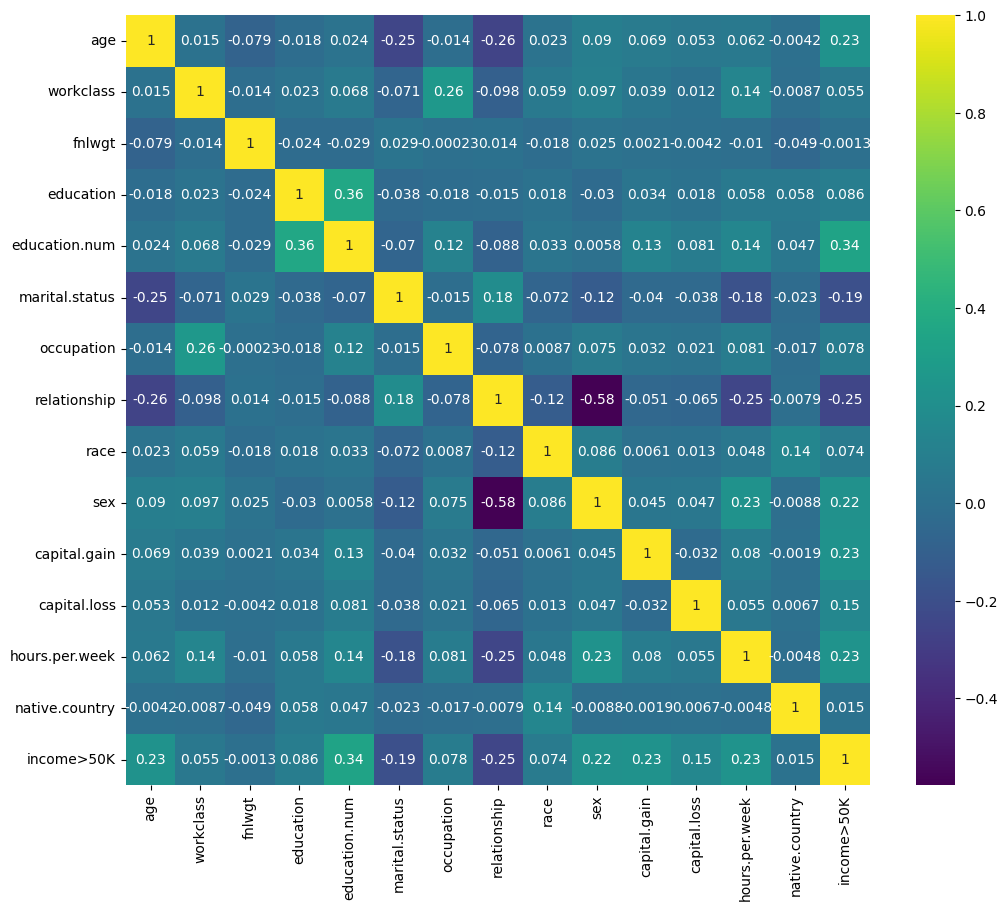

In [9]:
# Load the data from the CSV file
train = pd.read_csv('../data/income2023f/train_final.csv')
test = pd.read_csv('../data/income2023f/adult.test.csv')

# Separate the features from the labels                         
# X_train = train.drop('income>50K', axis=1)
# X_test = test.drop('income>50K', axis=1)
X_train = train
# X_test = test
#X_train with only columns 'marital-status', 'education-num', relationship, age
# X_train = X_train[['marital.status', 'education.num', 'relationship', 'age']]

y_train = train['income>50K']
y_train = y_train.replace(' >50K', 1)
y_train = y_train.replace(' <=50K', 0)
# y_train = y_train.replace(0, -1)
# y_test = test['income>50K']
# y_test = y_test.replace(' >50K.', 1)    
# y_test = y_test.replace(' <=50K.', 0)

# for column in X_train.columns:
#     if '?' in X_train[column].values and( X_train[column].dtype == type(object)):
#         X_train[column] = X_train[column].replace('?', X_train[column].mode()[0])
#     elif '?' in X_train[column].values:
#         X_train[column] = X_train[column].replace('?', X_train[column].median())

for column in X_train.columns:
    if X_train[column].dtype == type(object):
        encoder = LabelEncoder()
        X_train[column] = encoder.fit_transform(X_train[column])
        # X_test[column] = encoder.fit_transform(X_test[column])


import seaborn as sns

# # Convert 'income>50K' back to object type for better visualization
# train['income>50K'] = train['income>50K'].replace({0: '<=50K', 1: '>50K'})

# # Create a pair plot
# sns.pairplot(train, hue='income>50K')

import matplotlib.pyplot as plt

# Assuming that `df` is your DataFrame
corr = X_train.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()


In [11]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

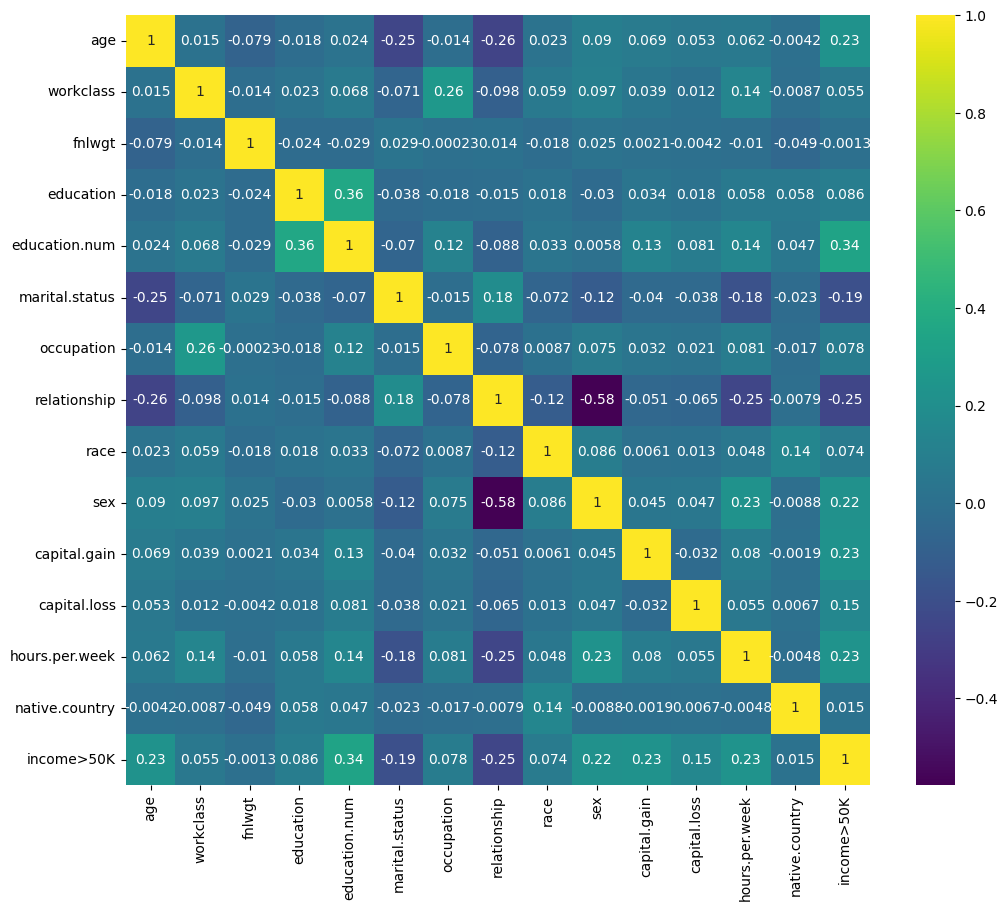

In [14]:
train = pd.read_csv('../data/income2023f/train_final.csv')
X_train = train

for column in X_train.columns:
    if X_train[column].dtype == type(object):
        encoder = LabelEncoder()
        X_train[column] = encoder.fit_transform(X_train[column])
corr = X_train.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

age = 0.23
education.num = 0.34
sex = 0.22
capital.gain = 0.22
capital.loss = 0.15
hours.per.week = 0.23



In [25]:


# Load the data from the CSV file

train = pd.read_csv('../data/income2023f/train_final.csv')
test = pd.read_csv('../data/income2023f/test_final.csv')

# Separate the features from the labels                         
# X_train = train.drop(['fnlwgt', 'income>50K', 'education', 'native.country', 'race', 'income>50K'], axis=1)
# X_test_f = test.drop(['fnlwgt', 'income>50K', 'education', 'native.country', 'race', 'income>50K'], axis=1)

# ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income>50K']

# train_final
X_train = train.drop(['workclass', 'fnlwgt', 'education', 'native.country', 'race', 'income>50K'], axis=1)
X_test_f = test.drop(['ID', 'workclass', 'fnlwgt', 'education', 'native.country', 'race'], axis=1)
y_train = train['income>50K']


for column in X_train.columns:
    if (X_train[column].isin(['?']).any() and X_train[column].dtype == type(object)):
        X_train[column] = X_train[column].replace('?', X_train[column].mode()[0])
    elif (X_train[column].isin(['?']).any()):
        X_train[column] = X_train[column].replace('?', X_train[column].median())



In [27]:
# # split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [28]:
# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_test_f_encoded = pd.get_dummies(X_test_f)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)
X_test_f_encoded.fillna(0, inplace=True)

In [31]:

X_train_encoded.shape[1]

34

In [ ]:
# perform svm training
svclassifier = SVC(kernel='rbf', gamma='scale', verbose=True, C=0.8)
svclassifier.fit(X_train_encoded, y_train)


In [11]:

# print results
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svclassifier.score(X_train_encoded, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svclassifier.score(X_test_encoded, y_test)))

Accuracy of SVM classifier on train set: 0.79
Accuracy of SVM classifier on test set: 0.78


In [ ]:
# Random Forest Parameter Tuning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000, 1100, 1200, 1300, 1400, 1500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

rf_random.fit(X_train_encoded, y_train)

print(rf_random.best_params_)



In [7]:
print(rf_random.best_params_)

{'n_estimators': 800, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}


adult.data
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000, 1100, 1200, 1300, 1400, 1500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}
{'n_estimators': 800, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70}

final_train
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000, 1100, 1200, 1300, 1400, 1500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}
{'n_estimators': 800, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}

final_train 70/30
{'n_estimators': 1500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90}

final_train 70/30
X_train = train.drop(['workclass', 'fnlwgt', 'education', 'native.country', 'race', 'income>50K'], axis=1)
{'n_estimators': 700, 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=700, min_samples_split=30, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True, random_state=42)

rfc.fit(X_train_encoded, y_train)



RandomForestClassifier(max_depth=30, min_samples_split=30, n_estimators=700,
                       random_state=42)

In [36]:
# predict
# pred_train = rfc.predict(X_train_encoded)
# pred_test = rfc.predict(X_test_encoded)

# print results
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rfc.score(X_train_encoded, y_train)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test_encoded, y_test)))

Accuracy of random forest classifier on train set: 0.89
Accuracy of random forest classifier on test set: 0.86


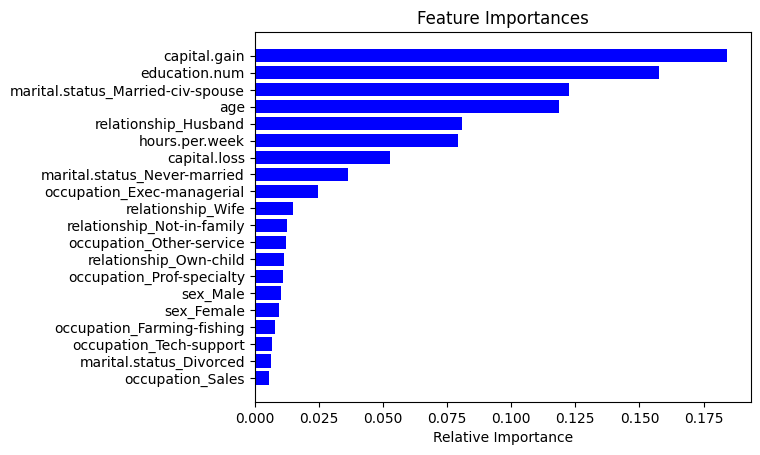

In [37]:
# Get the feature importances
importances = rfc.feature_importances_
feature_names = rfc.feature_names_in_
indices = np.argsort(importances)[-20:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
# feature purning

X_train_encoded_0 = X_train_encoded[[ 'capital.gain', 'education.num', 'marital.status_Married-civ-spouse', 'age', 'relationship_Husband', 'hours.per.week', 'capital.loss', 'marital.status_Never-married', 'occupation_Exec-managerial']]
X_test_encoded_0 = X_test_encoded[[ 'capital.gain', 'education.num', 'marital.status_Married-civ-spouse', 'age', 'relationship_Husband', 'hours.per.week', 'capital.loss', 'marital.status_Never-married', 'occupation_Exec-managerial']]
X_test_f_encoded_0 = X_test_f_encoded[[ 'capital.gain', 'education.num', 'marital.status_Married-civ-spouse', 'age', 'relationship_Husband', 'hours.per.week', 'capital.loss', 'marital.status_Never-married', 'occupation_Exec-managerial']]


In [39]:

rfc_0 = RandomForestClassifier(n_estimators=700, min_samples_split=30, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True, random_state=42)

rfc_0.fit(X_train_encoded_0, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=30, n_estimators=700,
                       random_state=42)

In [40]:
# results
print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rfc_0.score(X_train_encoded_0, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc_0.score(X_test_encoded_0, y_test)))

Accuracy of Random Forest classifier on train set: 0.89
Accuracy of Random Forest classifier on test set: 0.85


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

rf_random.fit(X_train_encoded_0, y_train)

print(rf_random.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

{'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [42]:
# train with best params after feature purning
rfc_0 = RandomForestClassifier(n_estimators=400, min_samples_split=30, min_samples_leaf=2, max_features='sqrt', max_depth=20, bootstrap=True, random_state=42)
rfc_0.fit(X_train_encoded_0, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=30,
                       n_estimators=400, random_state=42)

In [43]:
# results
print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rfc_0.score(X_train_encoded_0, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc_0.score(X_test_encoded_0, y_test)))

Accuracy of Random Forest classifier on train set: 0.88
Accuracy of Random Forest classifier on test set: 0.86


In [3]:
# Not using missing data
train = pd.read_csv('../data/income2023f/train_final.csv')
test = pd.read_csv('../data/income2023f/test_final.csv')

# Separate the between rows that include missing data and rows that do not include missing data
train_missing = train[train.isin(['?']).any(axis=1)]
train_not_missing = train[~train.isin(['?']).any(axis=1)]

# Separate the features from the labels
# X_train_missing = train_missing.drop('income>50K', axis=1)
X_train_nmd = train_not_missing.drop('income>50K', axis=1)
y_train_nmd = train_not_missing['income>50K']


# X_test_f = test.drop('ID', axis=1)




In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train_nmd, y_train_nmd, test_size=0.30, random_state=42)

In [5]:
# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
# X_test_f_encoded = pd.get_dummies(X_test_f)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)
# X_test_f_encoded.fillna(0, inplace=True)

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

rf_random.fit(X_train_encoded, y_train)

print(rf_random.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

{'n_estimators': 900, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}


In [21]:
# train with best params after feature purning
rfc_ = RandomForestClassifier(n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=100, bootstrap=True, random_state=42)
rfc_.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=900, random_state=42)

In [22]:
# results
print('Accuracy of Random Forest classifier on train set: {:.2f}'.format(rfc_.score(X_train_encoded, y_train)))
# print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc_.score(X_test_encoded, y_test)))

Accuracy of Random Forest classifier on train set: 0.89


In [43]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier


# scaler.fit(X_test_f_encoded)
# X_test_f_encoded = scaler.transform(X_test_f_encoded)

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)

# Train Adaboost Classifer
model = abc.fit(X_train_encoded, y_train)

# predict
# pred_train = model.predict(X_train_encoded)
# pred_test = model.predict(X_test_encoded)

# print results
print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(model.score(X_train_encoded, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(model.score(X_test_encoded, y_test)))

Accuracy of AdaBoost classifier on train set: 0.87
Accuracy of AdaBoost classifier on test set: 0.86


In [ ]:
# AdaBoost parameter tuning

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800 ,900, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]
}

abc = AdaBoostClassifier(random_state=42)

abc_random = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

abc_random.fit(X_train_encoded, y_train)


In [123]:
# best parameters
print(abc_random.best_params_)

{'n_estimators': 1000, 'learning_rate': 1}


In [126]:
# retrian with best parameters
abc = AdaBoostClassifier(n_estimators=1000, learning_rate=1, random_state=42)

# Train Adaboost Classifer
model = abc.fit(X_train_encoded, y_train)


Accuracy of AdaBoost classifier on train set: 0.87
Accuracy of AdaBoost classifier on test set: 0.86


In [127]:
# predict
# pred_train = model.predict(X_train_encoded)
# pred_test = model.predict(X_test_encoded)

# print results
print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(model.score(X_train_encoded, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(model.score(X_test_encoded, y_test)))


Accuracy of AdaBoost classifier on train set: 0.87
Accuracy of AdaBoost classifier on test set: 0.86


In [57]:
pred_test_f = rfc_0.predict(X_test_f_encoded_0)
pred_test_f = pd.DataFrame(pred_test_f)
pred_test_f.columns = ['Prediction']
pred_test_f.index = test['ID']
pred_test_f.to_csv('../data/income2023f/random_forest_2.csv')


In [71]:


svclassifier = SVC(kernel='rbf', verbose=True, max_iter=10000)
svclassifier.fit(X_train_encoded_0, y_train)
# train_pred = svclassifier.predict(X_train_encoded_0)
# test_pred = svclassifier.predict(X_train_encoded_0)
print('Accuracy of SVM classifier on train set: {:.2f}'.format(svclassifier.score(X_train_encoded_0, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svclassifier.score(X_test_encoded_0, y_test)))

# y_pred = svclassifier.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))




[LibSVM]....
**.
*
optimization finished, #iter = 4544
obj = -7639.091884, rho = -0.771136
nSV = 7967, nBSV = 7799
Total nSV = 7967
Accuracy of SVM classifier on train set: 0.79
Accuracy of SVM classifier on test set: 0.79


In [73]:
pred_test_f = svclassifier.predict(X_test_f_encoded_0)
pred_test_f = pd.DataFrame(pred_test_f)
pred_test_f.columns = ['Prediction']
pred_test_f.index = test['ID']
pred_test_f.to_csv('../data/income2023f/svm_2.csv')

In [5]:
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11797   638]
 [ 2699  1147]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     12435
           1       0.64      0.30      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.62      0.64     16281
weighted avg       0.77      0.80      0.77     16281

